In [ ]:
!wget http://opihi.cs.uvic.ca/sound/genres.tar.gz
!tar -xvf  genres.tar.gz

--2021-06-20 17:18:27--  http://opihi.cs.uvic.ca/sound/genres.tar.gz
Resolving opihi.cs.uvic.ca (opihi.cs.uvic.ca)... 142.104.68.135
Connecting to opihi.cs.uvic.ca (opihi.cs.uvic.ca)|142.104.68.135|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1225571541 (1.1G) [application/x-gzip]
Saving to: ‘genres.tar.gz’

genres.tar.gz       100%[===================>]   1.14G  12.9MB/s    in 91s     

2021-06-20 17:19:58 (12.9 MB/s) - ‘genres.tar.gz’ saved [1225571541/1225571541]

genres/
genres/bextract_single.mf
genres/bl.mf
genres/blues/
genres/cl.mf
genres/classical/
genres/co.mf
genres/country/
genres/di.mf
genres/disco/
genres/hi.mf
genres/hiphop/
genres/input.mf
genres/ja.mf
genres/jazz/
genres/me.mf
genres/metal/
genres/po.mf
genres/pop/
genres/re.mf
genres/reggae/
genres/ro.mf
genres/rock/
genres/rock/rock.00000.wav
genres/rock/rock.00001.wav
genres/rock/rock.00002.wav
genres/rock/rock.00003.wav
genres/rock/rock.00004.wav
genres/rock/rock.00005.wav
genres/rock/ro

In [ ]:
!du -sh * 

1.3G	genres
1.2G	genres.tar.gz
55M	sample_data


In [1]:
import librosa
import IPython.display as ipd
import sklearn
import matplotlib.pyplot as plt
import librosa.display
import glob
import numpy as np



In [2]:
class preprocess:
    def __init__(self,path):
        self.x, self.sr = librosa.load(path)
        self.spec=librosa.stft(self.x)
    def wave_plot(self):
        plt.figure(figsize=(14, 5))
        librosa.display.waveplot(self.x, sr=self.sr)
    
    def spectrogram_plot(self):
        X = librosa.stft(self.x)
        Xdb = librosa.amplitude_to_db(abs(X))
        plt.figure(figsize=(14, 5))
        librosa.display.specshow(Xdb, sr=self.sr, x_axis='time', y_axis='log')
        plt.colorbar()
        
    def feature_ext(self):
        
        timbral_features=[]
        
        #Zero crossings 
        self.zero_crossings = librosa.zero_crossings(self.x, pad=False)
        self.zero_c_mean=self.zero_crossings.mean()
        self.zero_c_var=self.zero_crossings.var()
        timbral_features.append(self.zero_c_mean)
        timbral_features.append(self.zero_c_var)

        #Spectral  Centroids
        self.spectral_centroids = librosa.feature.spectral_centroid(self.x, sr=self.sr)[0]
        self.spec_cent_mean=self.spectral_centroids.mean()
        self.spec_cent_var=self.spectral_centroids.var()
        timbral_features.append(self.spec_cent_mean)
        timbral_features.append(self.spec_cent_var)

        #Spectral Rolloff
        self.spectral_rolloff = librosa.feature.spectral_rolloff(self.x, sr=self.sr)[0]
        self.spec_roll_mean=self.spectral_rolloff.mean()
        self.spec_roll_var=self.spectral_rolloff.var()
        timbral_features.append(self.spec_roll_mean)
        timbral_features.append(self.spec_roll_var)

        #Spectral Flux
        self.spectral_flux = librosa.onset.onset_strength(y=self.x, sr=self.sr)
        self.spec_flux_mean=self.spectral_flux.mean()
        self.spec_flux_var=self.spectral_flux.var()
        timbral_features.append(self.spec_flux_mean)
        timbral_features.append(self.spec_flux_var)

        #Low energy feature rmse 
        hop_length = 256
        frame_length = 512
        self.rmsi = librosa.feature.rms(self.x, frame_length=frame_length, hop_length=hop_length, center=True)
        r1=self.rmsi
        self.rmsf=((r1[r1<r1.mean()]).shape[0])/(r1.shape[1])*100
        timbral_features.append(self.rmsf)

        #mfcc 
        self.mfcc = librosa.feature.mfcc(self.x, sr=self.sr)
        top_mcc=5
        self.mfcc_ls_mean=[]
        self.mfcc_ls_var=[]
        for i in range(top_mcc):
            #self.mfcc_ls_mean.append(self.mfcc[i].mean())
            timbral_features.append(self.mfcc[i].mean())   
            #self.mfcc_ls_var.append(self.mfcc[i].var())
            timbral_features.append(self.mfcc[i].var())
            
        return timbral_features;
    
        
#         hop_length = 512

        

    
#     def FeatureSpectralFlux(self):
#         X=self.spec
#         f_s=self.sr
#         isSpectrum = X.ndim == 1
#         if isSpectrum:
#             X = np.expand_dims(X, axis=1)

#         # difference spectrum (set first diff to zero)
#         X = np.c_[X[:, 0], X]

#         afDeltaX = np.diff(X, 1, axis=1)

#         # flux
#         vsf = np.sqrt((afDeltaX**2).sum(axis=0)) / X.shape[0]

#         return np.squeeze(vsf) if isSpectrum else vsf


In [3]:
genre_list=['blues','classical','country','disco','hiphop','jazz','metal','pop','reggae','rock']
genre_label=np.arange(10)
Data=[]

In [ ]:
def read_file(enter_genre):
    list_of_files = glob.glob('genres/'+enter_genre+'/./*.wav')
    Tfls=[]
    for path in list_of_files:
        aud=preprocess(path)
        fls=aud.feature_ext()
        fls.append(enter_genre)
        #print(fls)
        Tfls.append(fls)
        Data.append(fls)
        #print(path)
    return Tfls;
#         print(sum(audb.zero_crossings))
#     x1,sr1 = librosa.load(path)
#     print(x1.shape)

In [ ]:
# blue_dir
#headers=[zero_c_mean,zero_c_var,spec_cent_mean,spec_cent_var,spec_roll_mean,spec_roll_var,spec_flux_mean,spec_flux_var,low_enery,mfcc1_mean,mfcc1_var,mfcc2_mean,mfcc2_var,mfcc3_mean,mfcc3_var,mfcc4_mean,mfcc4_var,mfcc5_mean,mfcc5_var]
read_file('blues')
read_file('classical')


In [ ]:
read_file('country')
read_file('disco')
read_file('hiphop')
read_file('jazz')
read_file('metal')
read_file('pop')
read_file('reggae')
read_file('rock')

In [ ]:
len(Data)

1000

In [ ]:
Data_array=np.array(Data)

In [ ]:
Data_array.shape

(1000, 20)

In [5]:
import pandas as pd
headers=['zero_c_mean','zero_c_var','spec_cent_mean','spec_cent_var','spec_roll_mean','spec_roll_var','spec_flux_mean','spec_flux_var','low_enery','mfcc1_mean','mfcc1_var','mfcc2_mean','mfcc2_var','mfcc3_mean','mfcc3_var','mfcc4_mean','mfcc4_var','mfcc5_mean','mfcc5_var','genre']
#df=pd.DataFrame(data = Data_array,columns = headers)

In [6]:
#df.to_csv('file1.csv', index=False)
df= pd.read_csv('features_3_sec.csv')
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,zero_crossing_rate_mean,zero_crossing_rate_var,harmony_mean,harmony_var,perceptr_mean,perceptr_var,tempo,mfcc1_mean,mfcc1_var,mfcc2_mean,mfcc2_var,mfcc3_mean,mfcc3_var,mfcc4_mean,mfcc4_var,mfcc5_mean,mfcc5_var,mfcc6_mean,mfcc6_var,mfcc7_mean,mfcc7_var,mfcc8_mean,mfcc8_var,mfcc9_mean,mfcc9_var,mfcc10_mean,mfcc10_var,mfcc11_mean,mfcc11_var,mfcc12_mean,mfcc12_var,mfcc13_mean,mfcc13_var,mfcc14_mean,mfcc14_var,mfcc15_mean,mfcc15_var,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,3714.560359,1.080790e+06,0.081851,0.000558,-0.000078,0.008354,-0.000068,0.005535,129.199219,-118.627914,2440.286621,125.083626,260.956909,-23.443724,364.081726,41.321484,181.694855,-5.976108,152.963135,20.115141,75.652298,-16.045410,40.227104,17.855198,84.320282,-14.633434,83.437233,10.270527,97.001335,-9.708279,66.669891,10.183875,45.103611,-4.681614,34.169498,8.417439,48.269444,-7.233477,42.770947,-2.853603,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,3869.682242,6.722448e+05,0.087173,0.001030,-0.000099,0.004950,-0.000103,0.004854,123.046875,-125.590706,2038.344238,122.421227,216.774185,-20.718019,231.979767,50.128387,142.700409,-11.333302,139.243118,21.385401,77.817947,-15.960796,97.364029,19.454103,57.948093,-12.465918,68.271523,17.898169,56.222176,-11.732554,54.373909,8.145000,40.662876,-7.717751,30.808521,8.397150,48.784225,-8.300493,68.584824,4.074709,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,3997.639160,7.907127e+05,0.071383,0.000425,-0.000066,0.012476,0.000065,0.004357,123.046875,-132.441940,3798.532227,115.085175,257.321289,-14.811666,192.448074,50.189293,144.166031,-0.680819,128.376892,24.650375,66.371170,-13.506104,89.319336,15.643386,55.253967,-13.216637,120.308784,10.406025,35.757862,-7.991465,47.911613,11.853963,36.569931,-4.677677,40.725075,6.571110,30.686846,-2.424750,50.313499,4.806280,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,3568.300218,9.216524e+05,0.069426,0.000304,-0.000014,0.008318,0.000018,0.005927,123.046875,-118.231087,2508.781006,132.116501,332.650574,-18.758335,109.357529,39.769306,184.693344,-13.260426,144.398224,20.468134,122.516464,-14.563448,68.937332,18.745104,74.748886,-13.755463,73.868576,12.993759,41.549564,-12.648887,58.540478,10.389314,39.102024,-4.362739,60.714748,9.156193,40.411537,-9.889441,44.666325,-1.359111,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,3469.992864,6.102111e+05,0.070095,0.000289,0.000041,0.009634,-0.000106,0.005833,123.046875,-105.968376,2118.919922,134.643646,219.562622,-19.961748,171.878754,40.171753,103.120712,-14.271939,102.651230,18.734617,79.070000,-15.619381,48.510284,19.207966,53.642956,-18.274683,95.300995,14.316693,58.821163,-5.792194,55.030254,17.045437,43.229939,-5.681399,46.515259,5.705521,24.956211,-7.986080,39.816933,2.092937,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [7]:
df.head()
df.shape

(9990, 60)

In [8]:
from sklearn.preprocessing import LabelEncoder
class_list = df.iloc[:, -1]
Label_encoder = LabelEncoder()

In [9]:
y = Label_encoder.fit_transform(class_list)

In [10]:
from sklearn.preprocessing import StandardScaler
fit = StandardScaler()
X = fit.fit_transform(np.array(df.iloc[:, 2:-1], dtype = float))

In [13]:
#Spliting
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, shuffle=True, test_size=.30)
print(X_train.shape,len(y_test))

(6993, 57) 2997


#DNN Model with 3sec Features

In [14]:
from keras import regularizers
from keras import losses
from keras.models import Sequential 
from keras.layers import Dense, Activation
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, AveragePooling2D, Flatten
from keras.optimizers import RMSprop,SGD,Adam
# Plot
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

In [15]:
#DeepNeuralNetwork
class DNN_Model:

  def trainModel(self, model, epochs, optimizer,batch_size):
    
    model.compile(optimizer = optimizer,
                  loss = 'sparse_categorical_crossentropy',
                  metrics='accuracy')
    return model.fit(X_train,y_train,
                    validation_data = (X_test,y_test),
                    epochs= epochs,
                    batch_size=batch_size)
    
  # Create the model
  def generate_model(self, dropout_rate=0.2,l2_rate=0.0):
    model = Sequential()
    #Layer_1
    model.add(Dense(units=256, activation='relu',input_shape=(X_train.shape[1],), kernel_regularizer=regularizers.l2(l2_rate)))
    model.add(Dropout(dropout_rate))

    #Layer_2
    model.add(Dense(units=128, activation='relu', kernel_regularizer=regularizers.l2(l2_rate)))
    model.add(Dropout(dropout_rate))




    model.add(Dense(units=10, activation='softmax',kernel_regularizer=regularizers.l2(l2_rate) ))
    model.summary()
    return model;

  


In [16]:

batch_size = 128

dnn_model = DNN_Model()
model = dnn_model.generate_model(dropout_rate=0.35, l2_rate=0.0)
history = dnn_model.trainModel(model = model, epochs=200 , optimizer='adam',batch_size=batch_size)



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               14848     
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 49,034
Trainable params: 49,034
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
55/55 [==============================] - 14s 12ms/step - loss: 1.9419 - accuracy: 0.3071 - val_loss: 1.205

Test loss: 0.3457236886024475 / Test accuracy: 0.9115782380104065


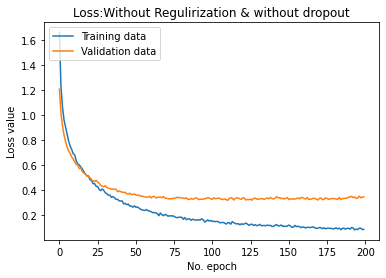

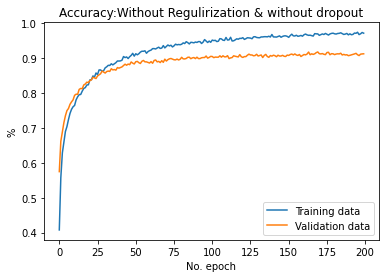

In [17]:
#Evaluation metrics
score = model.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')
# Plot history: Loss
plt.plot(history.history['loss'], label='Training data')
plt.plot(history.history['val_loss'], label='Validation data')
plt.title('Loss:Without Regulirization & without dropout')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()
# Plot history: Accuracy
plt.plot(history.history['accuracy'], label='Training data')
plt.plot(history.history['val_accuracy'], label='Validation data')
plt.title('Accuracy:Without Regulirization & without dropout')
plt.ylabel('%')
plt.xlabel('No. epoch')
plt.legend(loc="lower right")
plt.show()

In [18]:
from sklearn.metrics import classification_report

y_true = y_test
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

print(y_true.shape, y_pred.shape)
print(classification_report(y_true, y_pred, target_names=genre_list))

(2997,) (2997,)
              precision    recall  f1-score   support

       blues       0.92      0.94      0.93       289
   classical       0.94      0.95      0.94       294
     country       0.85      0.91      0.88       299
       disco       0.91      0.90      0.91       330
      hiphop       0.93      0.87      0.90       292
        jazz       0.89      0.94      0.91       291
       metal       0.95      0.96      0.95       315
         pop       0.91      0.91      0.91       286
      reggae       0.91      0.91      0.91       302
        rock       0.90      0.84      0.87       299

    accuracy                           0.91      2997
   macro avg       0.91      0.91      0.91      2997
weighted avg       0.91      0.91      0.91      2997



In [19]:
from keras.utils import np_utils
model.evaluate(X_test, y_test)

94/94 [==============================] - 0s 2ms/step - loss: 0.3457 - accuracy: 0.9116


[0.3457236886024475, 0.9115782380104065]

In [20]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_true, y_pred))

[[271   0   5   1   0   9   1   0   2   0]
 [  0 278   2   0   0  14   0   0   0   0]
 [  8   4 271   1   0   4   0   5   2   4]
 [  0   1   3 297   4   2   1   8   7   7]
 [  5   1   6   8 254   0   4   6   6   2]
 [  5  10   2   0   0 273   0   0   1   0]
 [  0   0   4   1   1   0 301   0   0   8]
 [  0   1   4   5   8   0   0 260   3   5]
 [  2   1   2   4   4   1   3   6 276   3]
 [  5   0  18   8   1   3   6   2   5 251]]


Accuracy %: 91.15782449115783


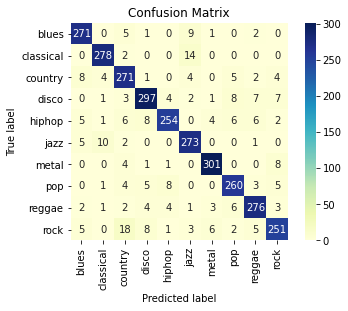

In [26]:
from sklearn.metrics import accuracy_score
print("Accuracy %:",accuracy_score(y_true, y_pred)*100)

### 10 clusters
from sklearn.metrics import confusion_matrix
import seaborn as sns

ax = plt.axes()
mat = confusion_matrix(y_true, y_pred)
sns.heatmap(mat,cmap="YlGnBu", square=True, annot=True, fmt='d',ax=ax, cbar=True,
            xticklabels=genre_list,
            yticklabels=genre_list)
ax.set_title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label');